In [1]:
import myutils

model_type = "rnn"
model = myutils.get_model(model_type = model_type, num_classes = 5)
model.eval();

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

path2weights = "./models/weights_"+model_type+".pt"
 
model.load_state_dict(torch.load(path2weights))
model.to(device);

In [6]:
path2vido = "../../../data/hmdb51_org/turn/50_FIRST_DATES_turn_h_nm_np1_fr_goo_23.avi"
frames, v_len = myutils.get_frames(path2vido, n_frames=16)
len(frames), v_len

(16, 48)

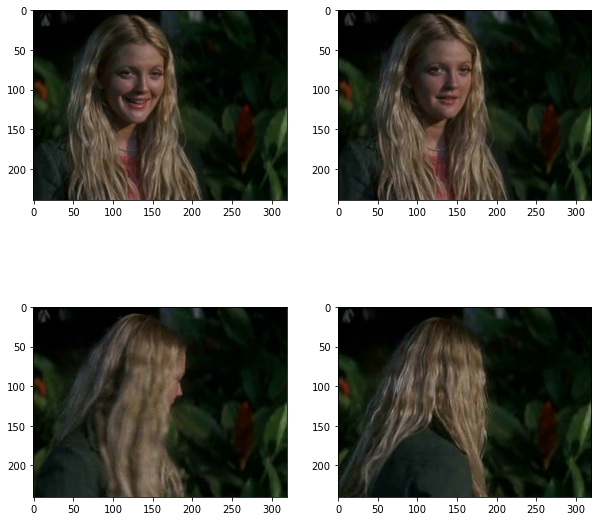

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for ii,img in enumerate(frames[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(img)

In [8]:
imgs_tensor = myutils.transform_frames(frames, model_type)
print(imgs_tensor.shape, torch.min(imgs_tensor), torch.max(imgs_tensor))

torch.Size([1, 16, 3, 224, 224]) tensor(-2.1179) tensor(2.5354)


In [ ]:
# 비디오를 제대로 읽지 못했을 때
#---------------------------------------------------------------------------
#RuntimeError                              Traceback (most recent call last)
#<ipython-input-5-bcd62578086f> in <module>
#----> 1 imgs_tensor = myutils.transform_frames(frames, model_type)
#      2 print(imgs_tensor.shape, torch.min(imgs_tensor), torch.max(imgs_tensor))
#
#~/KKH/git/PyTorch-Computer-Vision-Cookbook/Chapter10/myutils.py in transform_frames(frames, model_type)
#    240         frame_tr = test_transformer(frame)
#    241         frames_tr.append(frame_tr)
#--> 242     imgs_tensor = torch.stack(frames_tr)
#    243 
#    244     if model_type=="3dcnn":
#
#RuntimeError: stack expects a non-empty TensorList

In [9]:
with torch.no_grad():
    out = model(imgs_tensor.to(device)).cpu()
    print(out.shape)
    pred = torch.argmax(out).item()
    print(pred)

torch.Size([1, 5])
3
